#### Initial Descriptive Stats

1. Loading Data

Since the processed job ad data are stored in CSV files, first import the necessary libraries and read the data.

In [9]:
import pandas as pd
import os

# Set the path to the processed CSV files
data_folder = "processed_data"  # Update this if needed

# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Load all CSV files into a single DataFrame
df_list = [pd.read_csv(os.path.join(data_folder, file)) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)  # Merge them into one DataFrame

# Display first few rows
df.head()

# Save the first few rows to a CSV file
df.head().to_csv("head_of_data.csv", index=False, encoding="utf-8")


2. Check Basic Info

This will give an overview of columns, data types, and missing values.

In [10]:
df_info = df.info()

from IPython.display import display

display(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30905 entries, 0 to 30904
Columns: 264 entries, summary_AutomatchType to details
dtypes: bool(11), float64(105), int64(3), object(145)
memory usage: 60.0+ MB


None

3. Summary Statistics

To get a summary of numeric columns:

In [11]:
#df.describe()

# For categorical columns

df_categorical_summary = df.describe(include="object")

from IPython.display import display

display(df_categorical_summary)


,summary_Title,summary_JobHeadline,summary_Presentation,summary_HiringOrgName,summary_WorkPlaceAddress,summary_WorkPlaceCity,summary_PostingCreated,summary_LastDateApplication,summary_FormattedLastDateApplication,summary_AssignmentStartDate,...,details_ShowPrint,details_JobPositionPosting_ApplicationDetails_DailyWorkTimeMorning,details_JobPositionPosting_ApplicationDetails_DailyWorkTimeVarious,details_JobPositionPosting_RecruitingCompany_Name,details_JobPositionPosting_RecruitingCompany_Address_AddressLine,details_JobPositionPosting_RecruitingCompany_Address_Country_Name,details_JobPositionPosting_RecruitingCompany_Address_Region_Name,details_JobPositionPosting_RecruitingCompany_Address_City,details_JobPositionPosting_RecruitingCompany_PhoneNumber_Description,details_JobPositionPosting_RecruitingCompany_WebAddress
count,30905,30905,30867,30905,27298,29444,30905,30905,30905,30905,...,30854,12540,12540,1175,1010,354,343,1010,1010,282
unique,29416,29416,29011,8411,13379,573,6948,969,134,1,...,1,2,2,93,56,1,4,56,1,43
top,Rengøringsassistent,Rengøringsassistent,Kunne du tænke dig at få muligheden for at ska...,Københavns Kommune,,København NV,2022-05-04T00:00:00,2022-05-31T00:00:00,16. februar 2025,0001-01-01T00:00:00,...,False,False,False,Workindenmark,Tolderlundsvej 2,Danmark,Syddanmark,Odense C,Primary,http://silkeborgkommune.dk/
freq,34,34,66,895,924,1028,1505,1100,1106,30905,...,30854,11955,11461,165,79,354,105,79,1010,30


4. Check Missing Values

See if there are missing values in the dataset:

In [12]:
df.isnull().sum()

summary_AutomatchType                                              0
summary_Abroad                                                     0
summary_Weight                                                     0
summary_Title                                                      0
summary_JobHeadline                                                0
                                                               ...  
details_JobPositionPosting_RecruitingCompany_Address_Region    30905
details_JobPositionPosting_RecruitingCompany_Address           30905
details_JobPositionPosting_RecruitingCompany_PhoneNumber       30905
details_JobPositionPosting_HiringOrg                           30905
details                                                        30905
Length: 264, dtype: int64

5. Distribution of Job Titles

List the amount of each job title, and how many unique job titles there are

In [13]:
## Check how many of each job title we have
job_title_counts = df["summary_Occupation"].value_counts()

# Display the full list of job title counts
print(job_title_counts)

## Get the number of unique job titles
num_unique_titles = df["summary_Occupation"].nunique()
print(f"Total distinct job titles: {num_unique_titles}")


summary_Occupation
Pædagog                         1660
Sygeplejerske                   1320
Social- og sundhedsassistent    1297
Social- og sundhedshjælper       783
Rengøringsassistent              775
                                ... 
friluftsvejleder                   1
Maskinmesteraspirant               1
Staldmester                        1
Teatertekniker                     1
Sommelier                          1
Name: count, Length: 908, dtype: int64
Total distinct job titles: 908


6. Plotting Descriptive Statistics

Creating visualizations to explore the data.

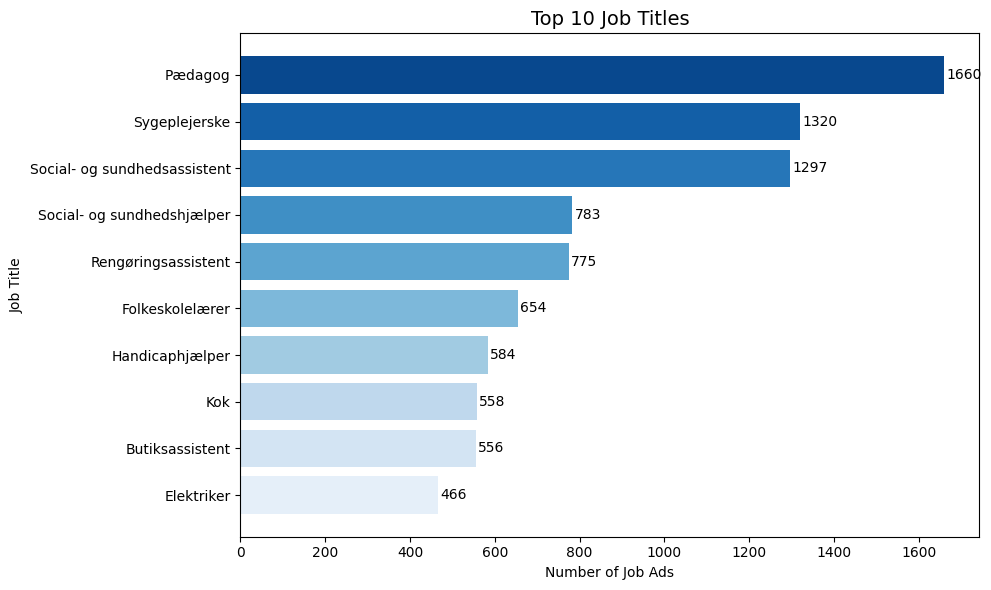

Plot saved to 'plot_outputs/top_10_job_titles.png'


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create output directory if it doesn't exist
output_dir = "plot_outputs"
os.makedirs(output_dir, exist_ok=True)

# Get top 10 job titles
job_counts = df["summary_Occupation"].value_counts().head(10)

# Reverse the order so the highest is at the top
job_counts = job_counts[::-1]

# Create color gradient using seaborn
colors = sns.color_palette("Blues", n_colors=10)

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(job_counts.index, job_counts.values, color=colors)

# Add value labels on each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{int(width)}', va='center', fontsize=10)

# Formatting
ax.set_title("Top 10 Job Titles", fontsize=14)
ax.set_xlabel("Number of Job Ads")
ax.set_ylabel("Job Title")
plt.tight_layout()

# Save the plot as a PNG file
plot_path = os.path.join(output_dir, "top_10_job_titles.png")
plt.savefig(plot_path, dpi=300)

# Show plot in notebook
plt.show()

print(f"Plot saved to '{plot_path}'")


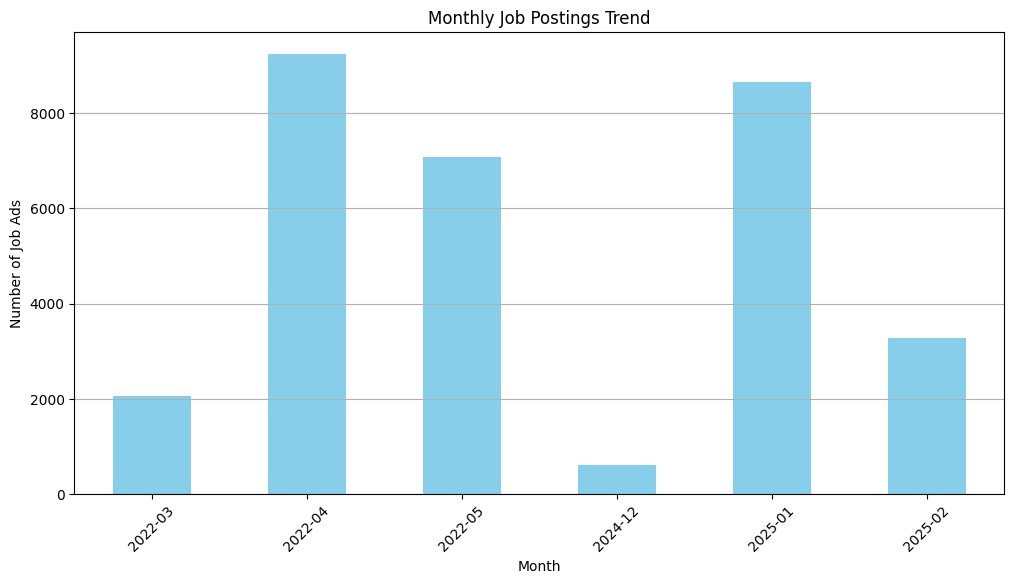

In [19]:
# Convert date column without modifying df
posting_dates = pd.to_datetime(df["summary_PostingCreated"], errors="coerce")

# Aggregate by month without changing the original DataFrame
df_monthly = posting_dates.dt.to_period("M").value_counts().sort_index()

# Plot
df_monthly.plot(kind="bar", figsize=(12,6), color="skyblue")

plt.title("Monthly Job Postings Trend")
plt.xlabel("Month")
plt.ylabel("Number of Job Ads")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()

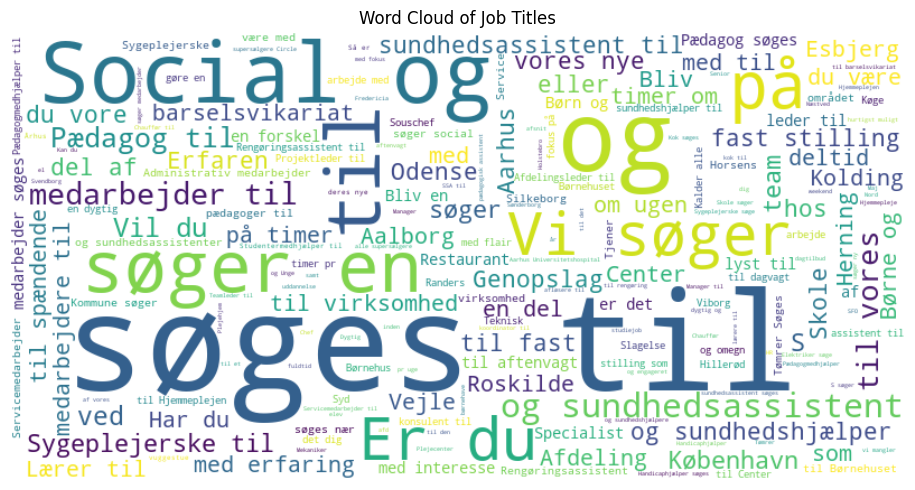

✅ Word cloud saved to 'plot_outputs/word_cloud_job_titles.png'


In [29]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create output directory if it doesn't exist
output_dir = "plot_outputs"
os.makedirs(output_dir, exist_ok=True)

# Generate word cloud
text = " ".join(df["summary_Title"].dropna())  # Combine job titles into one string
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot and show
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Job Titles")
plt.tight_layout()

# Save to file
output_path = os.path.join(output_dir, "word_cloud_job_titles.png")
plt.savefig(output_path, dpi=300)

# Display in notebook
plt.show()

print(f"✅ Word cloud saved to '{output_path}'")


7. Check for Duplicates

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
# If needed, remove duplicates
df = df.drop_duplicates()

#### Some more specific descriptive stats

1. Load Data & Preprocess

Ensure the dataset is loaded correctly, assuming there is a CSV with a column for job descriptions (description) and a column for the year (year).

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from textstat import flesch_reading_ease

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset (adjust file path as needed)
#df = pd.read_csv("jobnet_sample_extracted_data.csv")  

# Ensure 'year' is a numeric column and has the correct name
df['summary_PostingCreated'] = pd.to_numeric(df['summary_PostingCreated'], errors='coerce')

# Drop rows with missing descriptions
df = df.dropna(subset=['description'])

ModuleNotFoundError: No module named 'textstat'

2. Word Count Distribution

                count        mean         std  min    25%    50%    75%  \
Posting_Year                                                              
2022          18314.0  466.310691  270.955568  1.0  254.0  434.0  632.0   
2024            621.0  418.964573  282.665536  7.0  238.0  355.0  547.0   
2025          11919.0  554.606259  288.566571  1.0  333.0  527.0  727.0   

                 max  
Posting_Year          
2022          2275.0  
2024          2065.0  
2025          2269.0  


/var/folders/wb/6mdx7sq923sft6mn64xx6b600000gn/T/ipykernel_39746/4261372691.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Year")


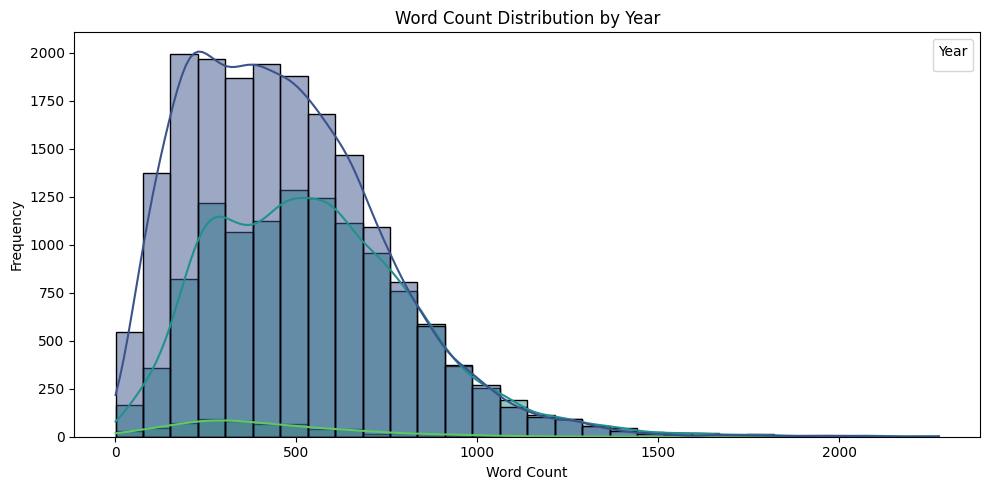

Plot saved to 'plot_outputs/word_count_distribution_by_year.png'


<Figure size 640x480 with 0 Axes>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Ensure datetime and extract year
df["summary_PostingCreated"] = pd.to_datetime(df["summary_PostingCreated"], errors="coerce")
df["Posting_Year"] = df["summary_PostingCreated"].dt.year.astype("str")  # Convert to string

# Create word count column
df["word_count"] = df["details_JobPositionPosting_JobPositionInformation_Purpose"].dropna().apply(
    lambda x: len(word_tokenize(x))
)

# Summary stats by year
print(df.groupby("Posting_Year")["word_count"].describe())

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="word_count", hue="Posting_Year", bins=30, kde=True, palette="viridis")

plt.title("Word Count Distribution by Year")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(title="Year")  
plt.tight_layout()
plt.show()

# Save to file
output_dir = "plot_outputs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "word_count_distribution_by_year.png")
plt.savefig(output_path, dpi=300)
print(f"Plot saved to '{output_path}'")


3. Lexical Diversity

Lexical diversity is the ratio of unique words to total words in a text.

                count      mean       std       min       25%       50%  \
Posting_Year                                                              
2022          18314.0  0.560615  0.095171  0.217754  0.494290  0.542787   
2024            621.0  0.568816  0.100628  0.326552  0.503378  0.558065   
2025          11919.0  0.532305  0.083308  0.226082  0.476647  0.518453   

                   75%  max  
Posting_Year                 
2022          0.609053  1.0  
2024          0.608696  1.0  
2025          0.574074  1.0  


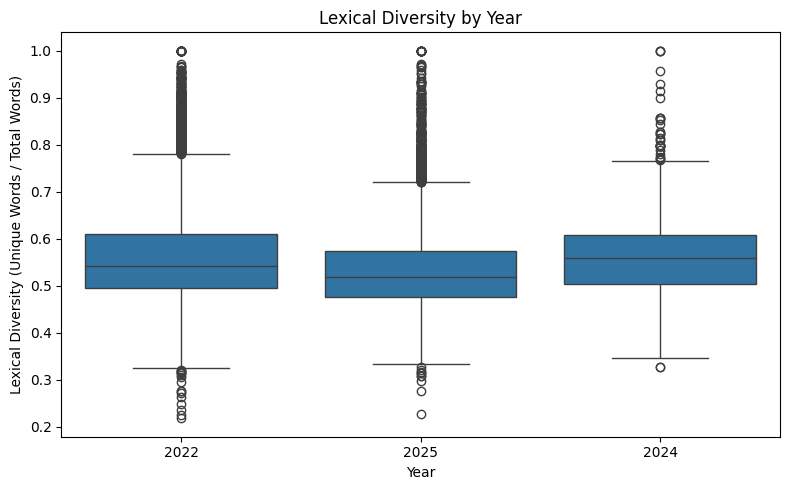

Lexical diversity plot saved to: plot_outputs/lexical_diversity_by_year.png


In [37]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Convert to datetime and extract year
df['summary_PostingCreated'] = pd.to_datetime(df['summary_PostingCreated'], errors='coerce')
df['Posting_Year'] = df['summary_PostingCreated'].dt.year.astype("str")  # For clean axis labels

# Calculate lexical diversity
def lexical_diversity(text):
    words = word_tokenize(text)
    return len(set(words)) / len(words) if len(words) > 0 else 0

df['lexical_diversity'] = df['details_JobPositionPosting_JobPositionInformation_Purpose'].dropna().apply(lexical_diversity)

# Summary statistics
print(df.groupby('Posting_Year')['lexical_diversity'].describe())

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Posting_Year', y='lexical_diversity')
plt.title("Lexical Diversity by Year")
plt.xlabel("Year")
plt.ylabel("Lexical Diversity (Unique Words / Total Words)")
plt.tight_layout()

# Save to plot_outputs
output_dir = "plot_outputs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "lexical_diversity_by_year.png")
plt.savefig(output_path, dpi=300)

# Show in notebook
plt.show()

print(f"Lexical diversity plot saved to: {output_path}")


4. Readability Scores (Flesch-Kincaid)

A lower score means harder-to-read text, while a higher score means easier readability.

                count       mean        std      min    25%    50%    75%  \
Posting_Year                                                                
2022          18314.0  55.829705  36.259661 -2416.79  49.59  57.87  65.32   
2024            621.0  51.433671  44.223000  -640.19  47.93  57.47  65.35   
2025          11919.0  54.525818  19.718823  -978.59  47.99  56.05  63.70   

                 max  
Posting_Year          
2022          108.84  
2024           95.47  
2025           93.24  


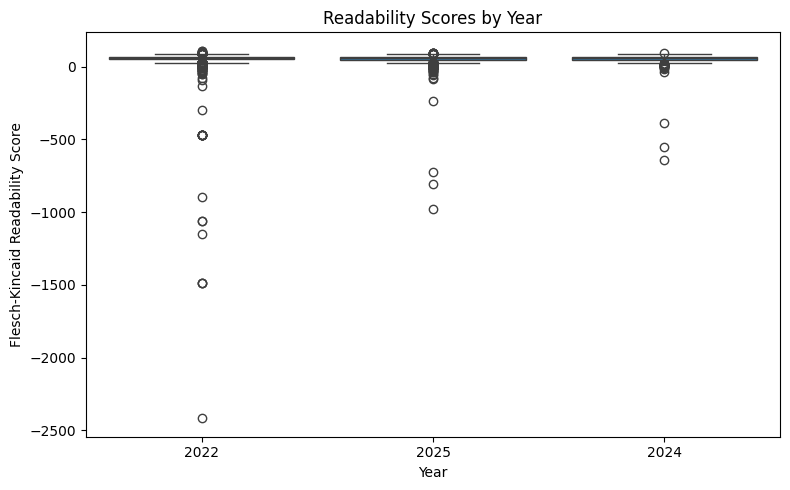

Readability boxplot saved to: plot_outputs/readability_scores_by_year.png


In [38]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from textstat import flesch_reading_ease

# Convert date to datetime and extract year
df['summary_PostingCreated'] = pd.to_datetime(df['summary_PostingCreated'], errors='coerce')
df['Posting_Year'] = df['summary_PostingCreated'].dt.year.astype("str")  # use string for cleaner x-axis labels

# Calculate readability
df['readability'] = df['details_JobPositionPosting_JobPositionInformation_Purpose'].dropna().apply(flesch_reading_ease)

# Summary statistics
print(df.groupby('Posting_Year')['readability'].describe())

# Create plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Posting_Year', y='readability')
plt.title("Readability Scores by Year")
plt.xlabel("Year")
plt.ylabel("Flesch-Kincaid Readability Score")
plt.tight_layout()

# Save to plot_outputs folder
output_dir = "plot_outputs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "readability_scores_by_year.png")
plt.savefig(output_path, dpi=300)

# Show plot in notebook
plt.show()

print(f"Readability boxplot saved to: {output_path}")


5. Most Frequent Words

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>



Most common words in 2022:
[('kan', 53492), ('vores', 43617), ('arbejde', 28952), ('så', 24372), ('and', 24065), ('the', 23527), ('samt', 20563), ('stillingen', 20367), ('søger', 19153), ('ansøgning', 18618), ('erfaring', 16842), ('to', 16774), ('del', 16628), ('god', 15990), ('gode', 15958), ('samarbejde', 15884), ('ved', 15442), ('opgaver', 15286), ('både', 14932), ('dine', 14906)]

Most common words in 2025:
[('kan', 38371), ('vores', 35765), ('arbejde', 21470), ('and', 20316), ('the', 20283), ('stillingen', 17724), ('så', 17484), ('del', 15230), ('samt', 14361), ('to', 14227), ('samarbejde', 14189), ('søger', 13798), ('ansøgning', 13772), ('erfaring', 13377), ('opgaver', 13367), ('både', 13132), ('dine', 13057), ('2025', 12371), ('gode', 12124), ('of', 12105)]

Most common words in 2024:
[('and', 1850), ('the', 1610), ('vores', 1600), ('kan', 1429), ('to', 1024), ('of', 978), ('arbejde', 893), ('in', 815), ('så', 773), ('a', 742), ('søger', 653), ('del', 603), ('team', 561), ('erf

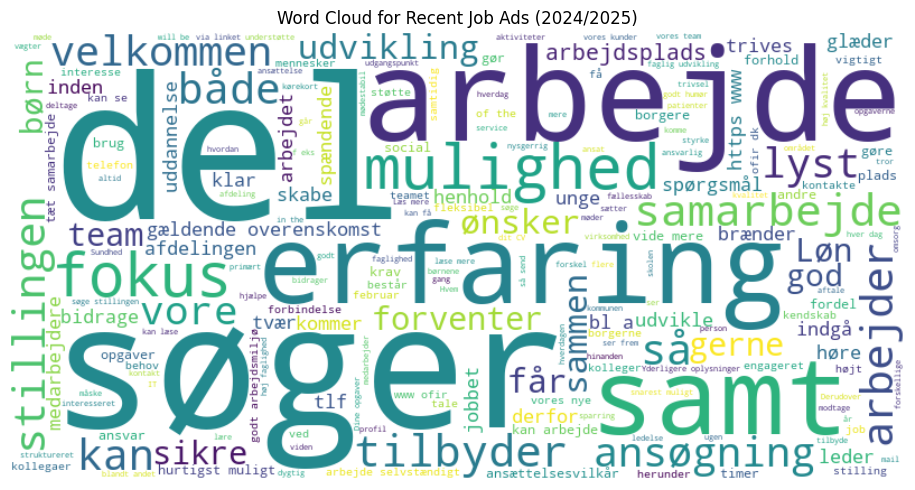

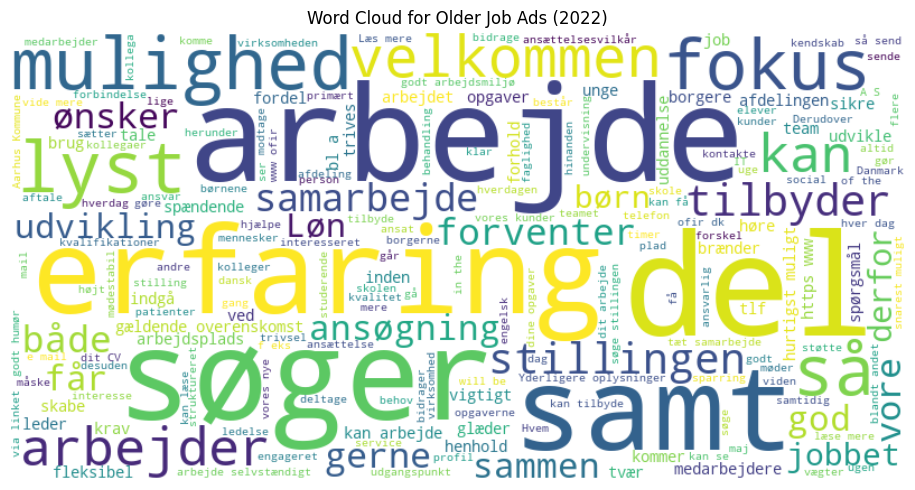

Word clouds saved to:
- plot_outputs/word_cloud_recent_ads_2024_2025.png
- plot_outputs/word_cloud_older_ads_2022.png


In [36]:
import os
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

# Create output directory if it doesn't exist
output_dir = "plot_outputs"
os.makedirs(output_dir, exist_ok=True)

# Ensure stopwords are downloaded (if not already)
nltk.download('punkt')
nltk.download('stopwords')

# Define Danish stopwords
stop_words = set(stopwords.words('danish'))

# Convert posting date column to datetime and extract year
df["summary_PostingCreated"] = pd.to_datetime(df["summary_PostingCreated"], errors="coerce")
df["Posting_Year"] = df["summary_PostingCreated"].dt.year

# Function to get most common words
def get_most_common_words(texts, n=20):
    words = []
    for text in texts.dropna():
        words.extend([word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words])
    return Counter(words).most_common(n)

# Print top words per year
for year in df["Posting_Year"].dropna().unique():
    print(f"\nMost common words in {int(year)}:")
    print(get_most_common_words(df[df["Posting_Year"] == year]["details_JobPositionPosting_JobPositionInformation_Purpose"]))

# Create word clouds
recent_texts = ' '.join(df[df["Posting_Year"] >= 2024]["details_JobPositionPosting_JobPositionInformation_Purpose"].dropna())
older_texts = ' '.join(df[df["Posting_Year"] < 2024]["details_JobPositionPosting_JobPositionInformation_Purpose"].dropna())

wordcloud_recent = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(recent_texts)
wordcloud_older = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(older_texts)

# Plot + Save recent job ads word cloud
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.imshow(wordcloud_recent, interpolation='bilinear')
ax1.axis("off")
ax1.set_title("Word Cloud for Recent Job Ads (2024/2025)")
fig1.tight_layout()
recent_path = os.path.join(output_dir, "word_cloud_recent_ads_2024_2025.png")
fig1.savefig(recent_path, dpi=300)

# Plot + Save older job ads word cloud
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.imshow(wordcloud_older, interpolation='bilinear')
ax2.axis("off")
ax2.set_title("Word Cloud for Older Job Ads (2022)")
fig2.tight_layout()
older_path = os.path.join(output_dir, "word_cloud_older_ads_2022.png")
fig2.savefig(older_path, dpi=300)

# Show both in notebook
plt.show()

print(f"Word clouds saved to:\n- {recent_path}\n- {older_path}")
